<a href="https://colab.research.google.com/github/Nithinkumar55/Full-stack-Data-Science-AI-using-chatgpt/blob/main/regression_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


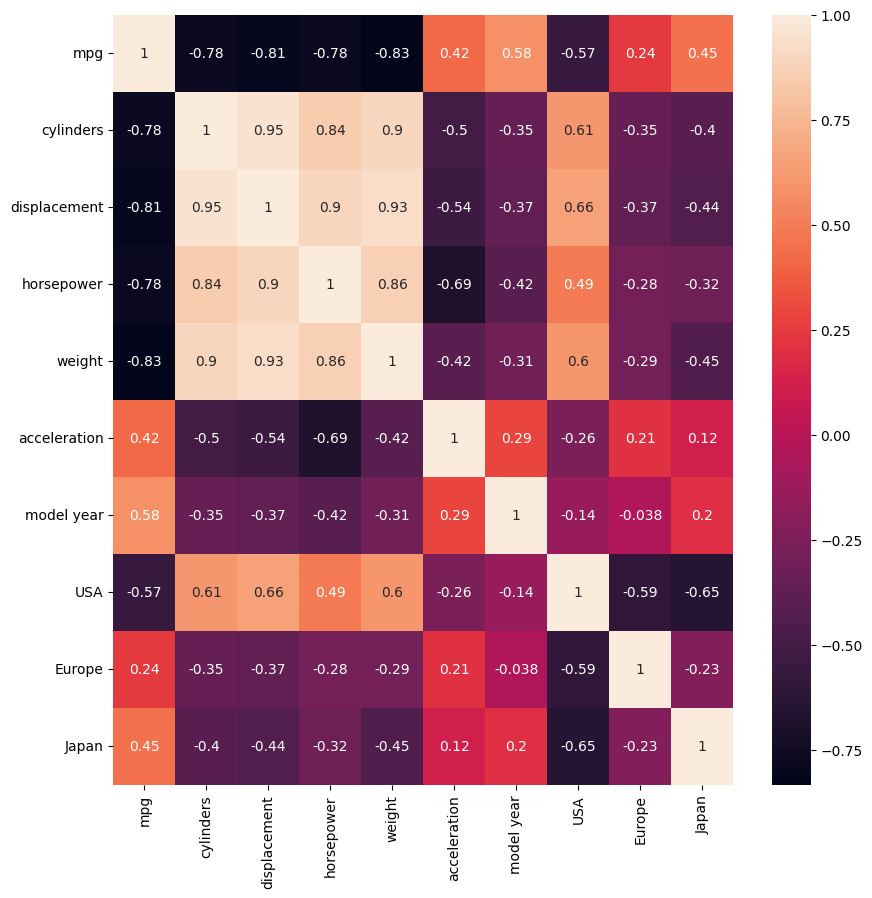

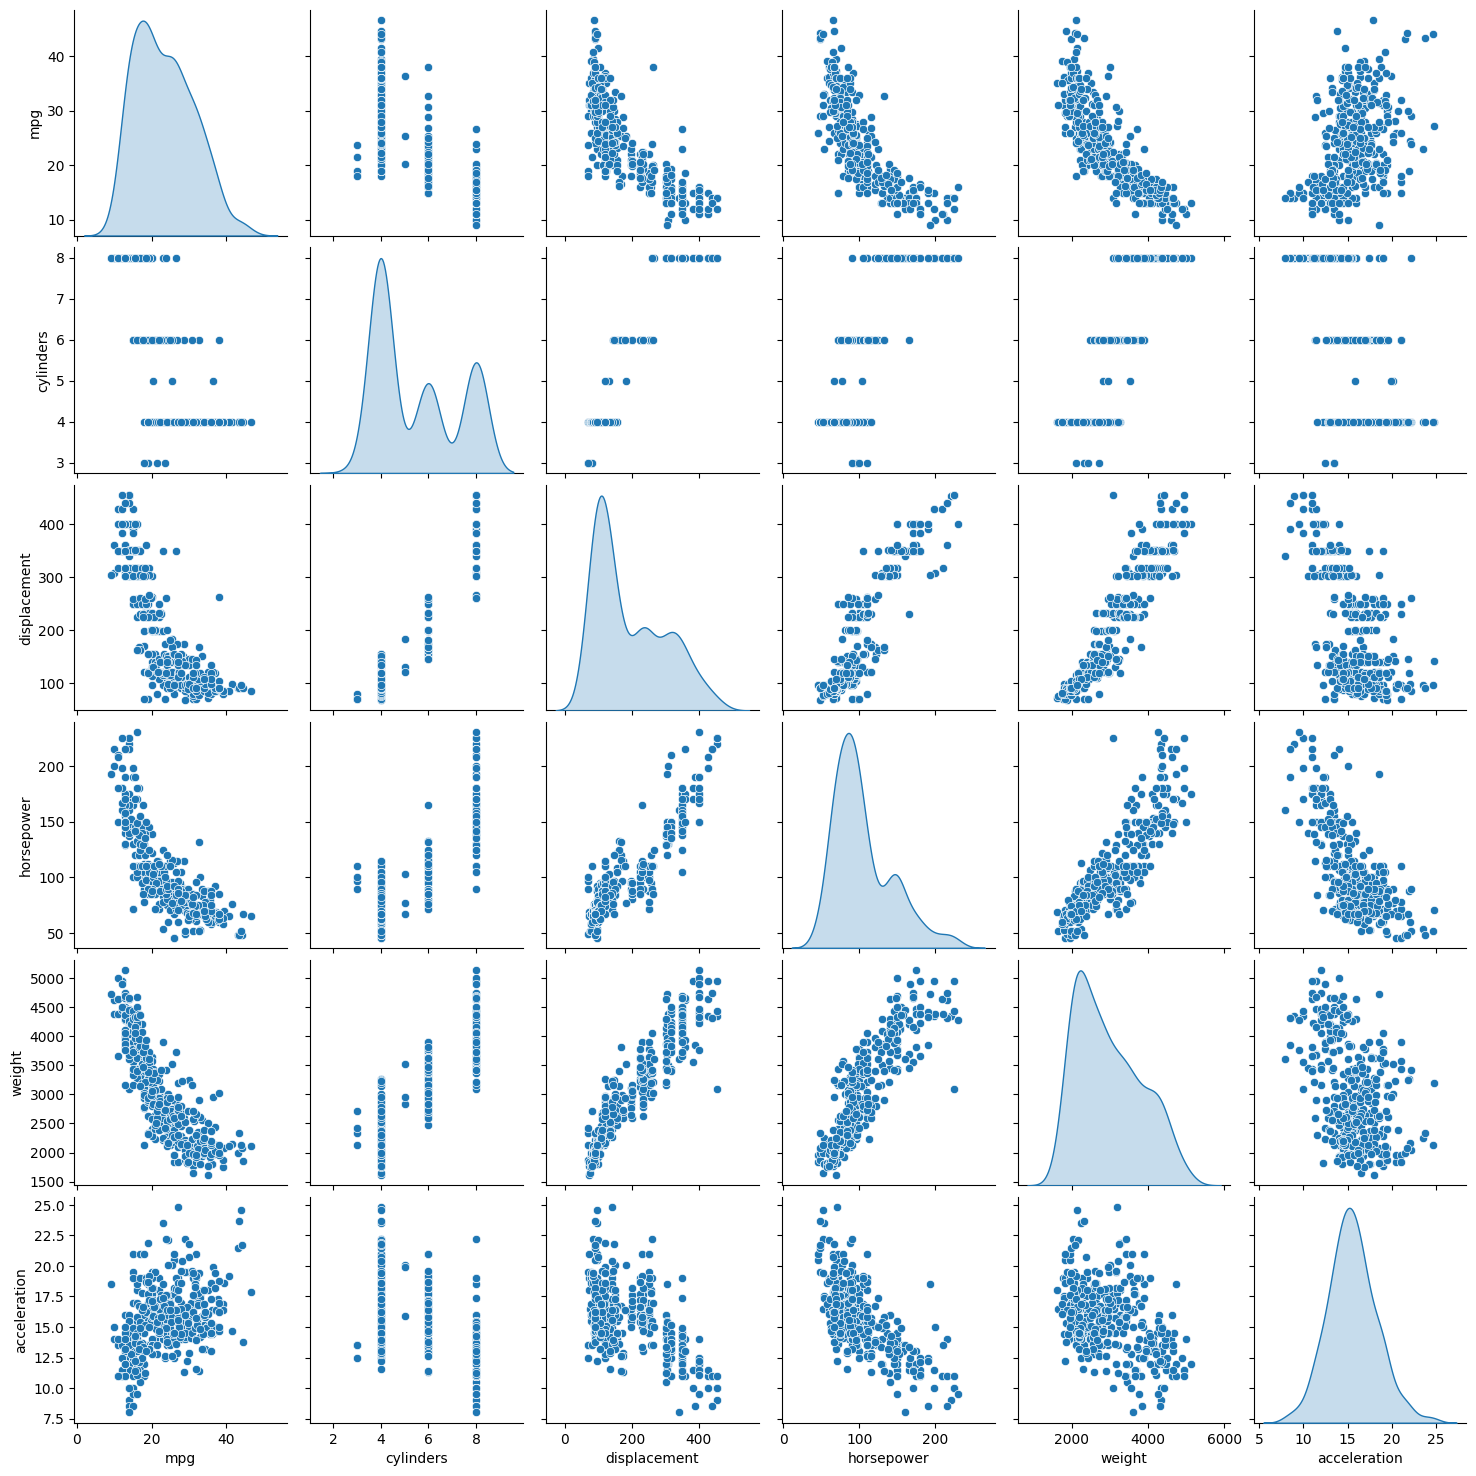

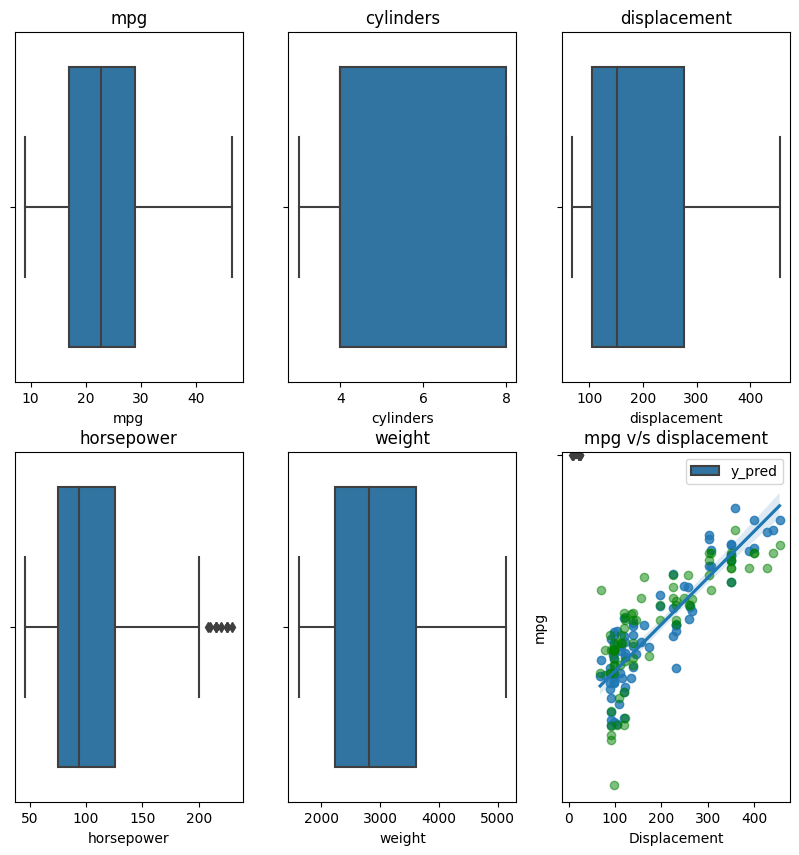

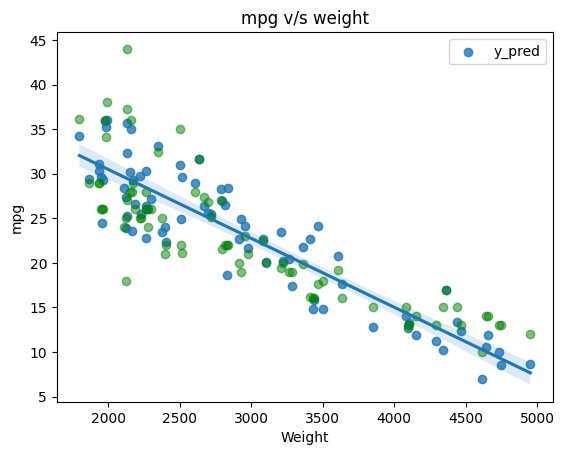

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 5s 25ms/step - loss: 4627.6255 - mae: 42.0748 - mse: 4627.6255 - val_loss: 207.5515 - val_mae: 12.0564 - val_mse: 207.5515
Epoch 2/500
10/10 [==============================] - 0s 10ms/step - loss: 526.0716 - mae: 17.0813 - mse: 526.0

In [ ]:
#GOAL
#Predict fuel efficiency using Artificial Neural Network
#Compare it with Linear Regression Model

#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv')


#data description
data.sample(10)

#our target will be mpg(miles per gallon)
data.shape

#checking for null values
data.isna().sum()

#unique values for every feature
data.nunique()

#checking the data types
data.dtypes

#We note that horsepower feature is an object datatype while semantically it should be numeric.
#So, we will convert it into float datatype

data['horsepower'] = pd.to_numeric(data.horsepower, errors = 'coerce')

data.dtypes

data.isna().sum()

#Unsuccessfull parsings from string to numeric of horsepower feature are set to null. Due to which, now we have 6 null values in our horsepower feature.

data = data.dropna()

data.describe()

origin = data.pop('origin')

#Performing One-Hot Encoding manually
data['USA'] = (origin == 1)*1.0
data['Europe'] = (origin == 2)*1.0
data['Japan'] = (origin == 3)*1.0


data.head()

data.pop('car name')

data.dtypes

#DATA VISUALIZATION

#correlation plot
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True)

#pair plot
sns.pairplot(data[['mpg','cylinders','displacement','horsepower','weight','acceleration']],diag_kind = 'kde')


features = ['mpg','cylinders','displacement','horsepower','weight','acceleration']
#outliers
plt.figure(figsize = (10,10))
for i, feature in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = data[feature])
    plt.title(feature)

#feature scaling
from sklearn.preprocessing import StandardScaler
X = data.drop(['mpg'], axis = 1)
Y = data['mpg']

scaler = StandardScaler()
data[['mpg','cylinders','displacement','weight','acceleration','model year']] = scaler.fit_transform(data[['mpg','cylinders','displacement','weight','acceleration','model year']])

data.head()

#TRAIN-TEST SPLIT

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr_model = lr.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)


# mpg vs displacement

x = x_test['displacement']

sns.regplot(x=x, y=y_pred)
plt.scatter(x, y_test,color = 'g', alpha = 0.5)
plt.title('mpg v/s displacement')
plt.xlabel('Displacement')
plt.ylabel('mpg')
plt.legend(['y_pred'])
plt.show()


# mpg vs weight

x = x_test['weight']

sns.regplot(x=x, y=y_pred)
plt.scatter(x, y_test,color = 'g', alpha = 0.5)
plt.title('mpg v/s weight')
plt.xlabel('Weight')
plt.ylabel('mpg')
plt.legend(['y_pred'])
plt.show()


from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


pd.DataFrame(list(zip(y_test, y_pred)), columns = ['Actual Values', 'Predicted Values'])


# NEURAL NETWORK MODEL

model = tf.keras.Sequential([tf.keras.layers.Dense(units=64, activation = tf.nn.relu, input_shape = [x_train.shape[1]]), tf.keras.layers.Dense(units = 64, activation = tf.nn.relu), tf.keras.layers.Dense(units=1)])

model.compile(loss = 'mse', optimizer = tf.keras.optimizers.RMSprop(0.001), metrics = ['mae', 'mse'])

model.summary()

history = model.fit(x_train, y_train, epochs = 500, validation_data=(x_test, y_test))

hist = pd.DataFrame(history.history)
hist.tail()

y_pred = model.predict(x_test)

pd.DataFrame(list(zip(y_test,y_pred)), columns = ['Actual Values','Predicted Values'])

r2_score(y_test, y_pred)

loss, mae, mse = model.evaluate(x_test, y_test)
